# Exploratory Data Analysis

EDA is nothing but exlporing the data by using some means to infer rational insights to gain better understanding of the data. Data Science usually involves myriad number of techniques for EDA , in this post we will discuss most commonly used techniques.



## Libraries we will be using for EDA


## Pandas

Pandas is a great library for Data Science. It provides high level abstraction implementation for analysing the data. 
Click this link for its documentation : https://pandas.pydata.org/pandas-docs/stable/ 

## Seaborn and Matplotlib

Seaborn is another important package for visualizing the data, it provides one line python functions to plot the data similiar to MatPlotLib in MATLab except Matplotlib is not useful in some cases for visualizing where seaborn compensates this lack. Seaborn has great visualising  tools like Violinplots for making better inference from the data. 

### Why Violoinplot

Violin plots give you 25th, 50th(Median), 75th quartile of the data plus it gives you <a href="https://www.youtube.com/watch?v=Fvi9A_tEmXQ"> Probability Density Function</a> This link from <a href="https://www.khanacademy.org">  Khan academy  </a>        gives you awesome explanation of what it is!

Simple Violinplot:

![alt text](https://cdn-images-1.medium.com/max/2000/1*dlLAJ_R1x-1wJG14baaC9w.png)

## Numpy

Numpy is Numerical Python library for doing high level math computations involving complex data structures like matrices easily.




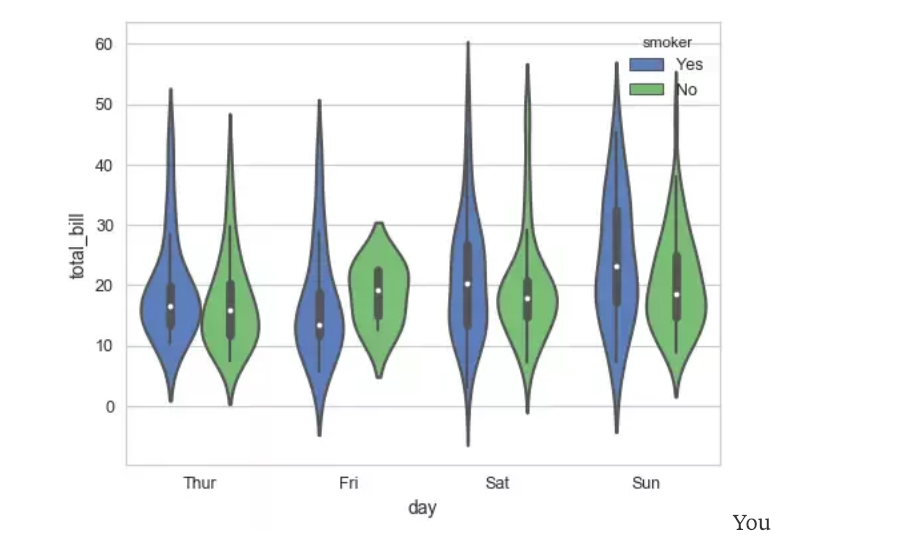

## Objective 

1. Lets take haberman's cancer survival dataset which depicts status of the patient after 5 years, considering the features like year on which they are operated, age and number of positive lymph nodes.
2. We conduct Univariate, Bi-Variate and Multivariate analysis for gaining better understanding of the data
3. This notebook's purpose is to demonstrate various EDA techniques but not to create a baseline model straight from the EDA techniques (FYI: dataset is imbalanced anyway).

### Status:

1 - Patient survived after 5 years

2 - Patient did not survive after 5 years

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
hm = pd.read_csv("haberman.csv",names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
print(hm.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [8]:
hm['survival_status_after_5_years'] = hm['survival_status_after_5_years'].map({1:"yes", 2:"no"})

In [4]:
hm.shape


(306, 4)

In [30]:
hm['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

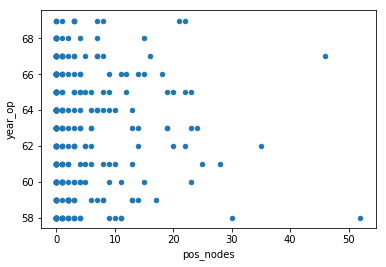

In [6]:
hm.plot(kind='scatter', x='pos_nodes', y='year_op') ;
plt.show()

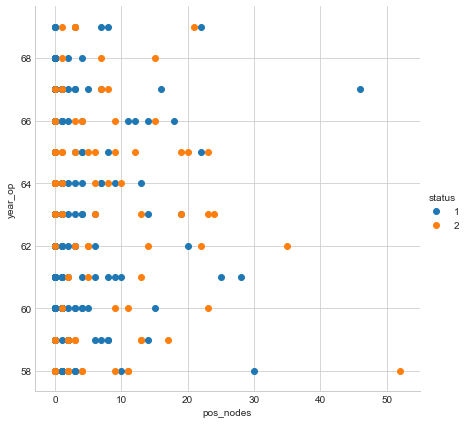

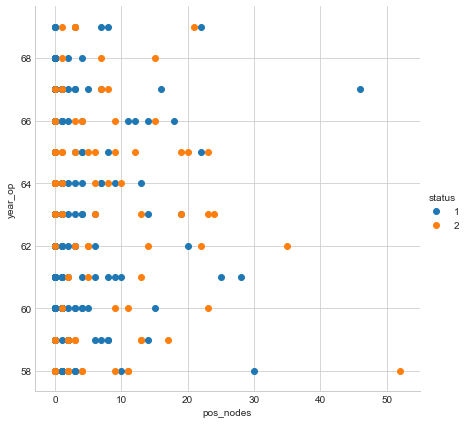

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="status", size=6) \
   .map(plt.scatter, "pos_nodes", "year_op") \
   .add_legend();
plt.show();

sns.FacetGrid(hm, hue="status", size=6) \
   .map(plt.scatter, "pos_nodes", "year_op") \
   .add_legend();
plt.show();

## Pairplot for Bi-Variate Analysis

   age  year_op  pos_nodes  status
0   30       64          1       1
1   30       62          3       1
2   30       65          0       1
3   31       59          2       1
4   31       65          4       1


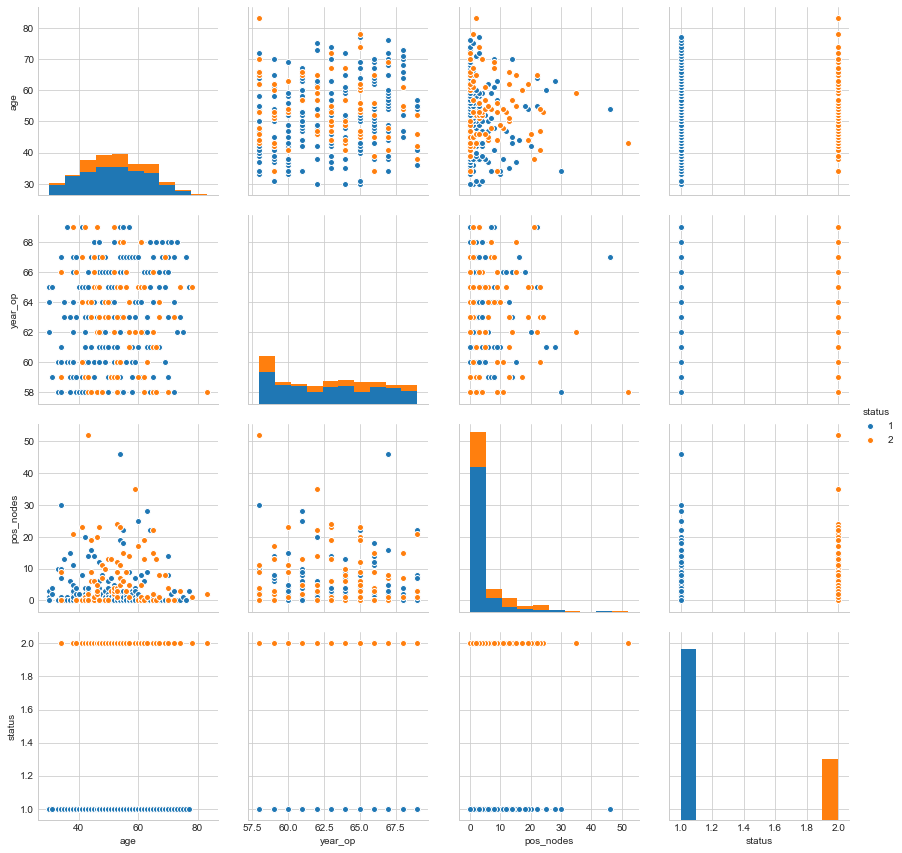

In [12]:
plt.close();
print(hm.head())
sns.set_style("whitegrid");
sns.pairplot(hm, hue="status", size=3);
plt.show()

## Observations:

1. Almost all pairplots are not linearly separable between status' 1 and 2.
2. Pos_nodes and Year_op features seem to have slightly better separation than other features combined. 

## Histogram, PDF & CDF for Univariate Analysis

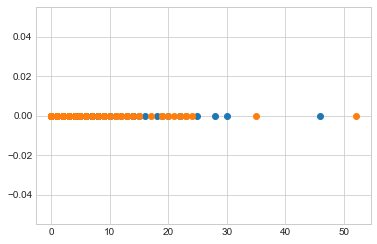

In [19]:
import numpy as np
one = hm.loc[hm["status"] == 1];
two = hm.loc[hm["status"] == 2];


plt.plot(one["pos_nodes"], np.zeros_like(one['pos_nodes']), 'o')
plt.plot(two["pos_nodes"], np.zeros_like(two['pos_nodes']), 'o')

plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


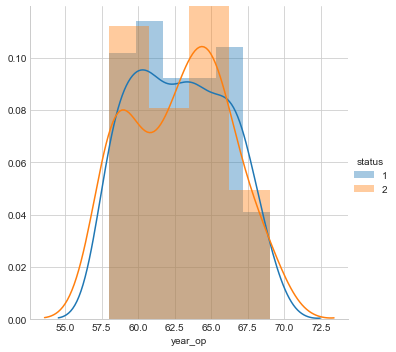

In [20]:
sns.FacetGrid(hm, hue="status", size=5) \
   .map(sns.distplot, "year_op") \
   .add_legend();
plt.show();

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


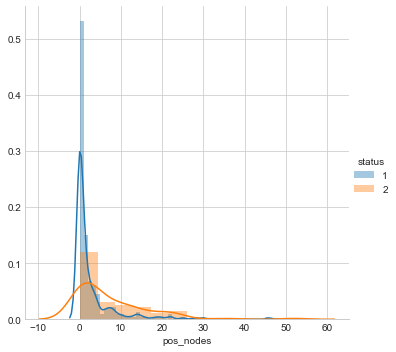

In [21]:
sns.FacetGrid(hm, hue="status", size=5) \
   .map(sns.distplot, "pos_nodes") \
   .add_legend();
plt.show();

## Observation:

1. Obviously a better plot than taking year_op feature.
2. Number of people with Positive lymph nodes is high from 0 - 5 for survivors.
3. More chances a person falls into non-survival group if the positive lymph nodes is more than 5.


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


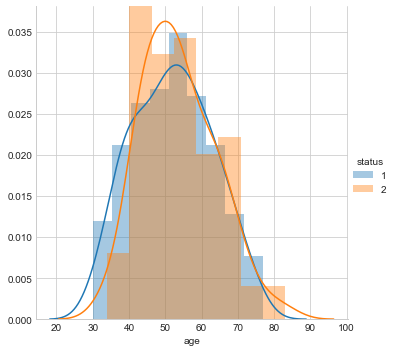

In [22]:
sns.FacetGrid(hm, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

## Observation
1. More chances of non survival of the age is between 40-55
2. If age is greater than 60, it is almost impossible to predict 1 or 2.
3. If age is lesser than 40, it is reasonable to say person has higher chances of surviving.


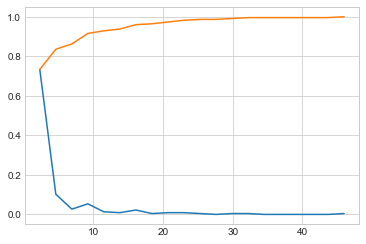

In [26]:
counts, bin_edges = np.histogram(one['pos_nodes'], bins=20, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)



plt.show();


## Observations
1. 80% of the survivor patients have 0-5 positive nodes

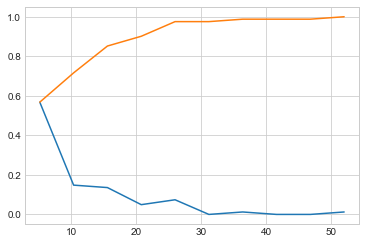

In [31]:
counts, bin_edges = np.histogram(two['pos_nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();


## Observation

1. 80% of non-survivor patients have positive nodes in the range of 0-15, so we might infer 5-10 nodes can signify higher risk of non survival.


# Combining both the plots

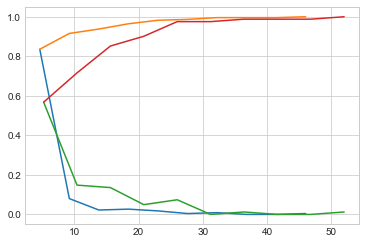

In [34]:
# Plots of CDF of petal_length for various types of flowers.


# survived after 5 years
counts, bin_edges = np.histogram(one['pos_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# not survived after 5 years
counts, bin_edges = np.histogram(two['pos_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

In [48]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Survivors after 5 years",np.mean(one["pos_nodes"]))
#Mean with an outlier.
#print(np.mean(np.append(iris_setosa["petal_length"],50)));
print("Non Survivors after 5 years",np.mean(two["pos_nodes"]))
print("Survivors after 5 years",np.mean(one["age"]))
print("Non Survivors after 5 years",np.mean(two["age"]))

print("\nStd-dev:Pos_nodes");
print("Survivors after 5 years",np.std(one["pos_nodes"]))
print("Non Survivors after 5 years",np.std(two["pos_nodes"]))

print("\nStd-dev:Age")
print("Survivors after 5 years",np.std(one["age"]))
print("Non Survivors after 5 years",np.std(two["age"]))







Means:
Survivors after 5 years 2.7911111111111113
Non Survivors after 5 years 7.45679012345679
Survivors after 5 years 52.01777777777778
Non Survivors after 5 years 53.67901234567901

Std-dev:Pos_nodes
Survivors after 5 years 5.857258449412131
Non Survivors after 5 years 9.128776076761632

Std-dev:Age
Survivors after 5 years 10.98765547510051
Non Survivors after 5 years 10.10418219303131


## Observation

1. Mean of pos_nodes differentiates between survivor and non-survivor candidates where mean of age nor year does not signify apparently.
2. Std_dev of pos_nodes for survivors is very less compared to non-survivors where as Std_dev on Age does not signify any useful information.


## Lets take a look at how median is distributed for survivors and non-survivors

In [49]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(one["pos_nodes"]))
print(np.median(two["pos_nodes"]))

print("\nQuantiles:")
print(np.percentile(one["pos_nodes"],np.arange(0, 100, 25)))
print(np.percentile(two["pos_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(one["pos_nodes"],90))
print(np.percentile(two["pos_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(one["pos_nodes"]))
print(robust.mad(two["pos_nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


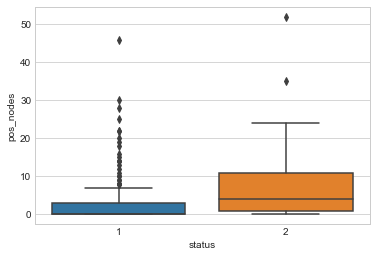

In [50]:
sns.boxplot(x='status',y='pos_nodes', data=hm)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


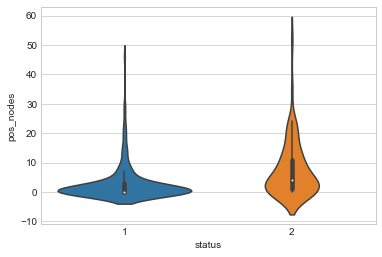

In [51]:
sns.violinplot(x="status", y="pos_nodes", data=hm, size=8)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


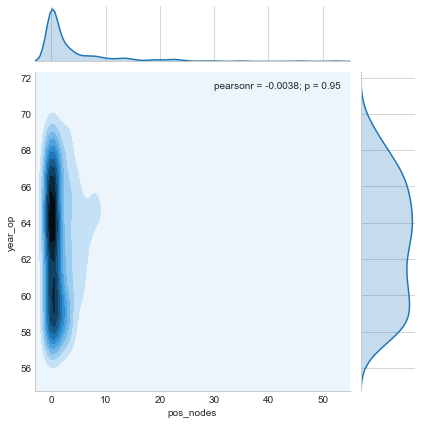

In [52]:
sns.jointplot(x="pos_nodes", y="year_op", data=hm, kind="kde");
plt.show();


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


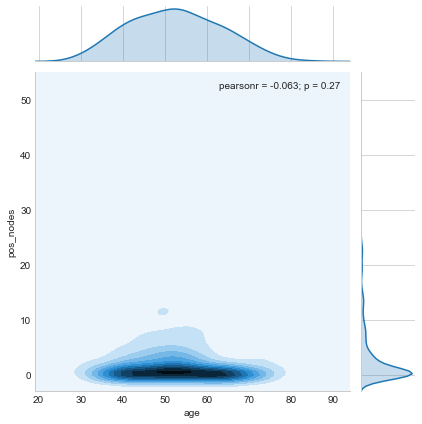

In [53]:
sns.jointplot(x="age", y="pos_nodes", data=hm, kind="kde");
plt.show();

## Conclusion

1. If dataset is balanced, we could have built average accuracy baseline model.
2. Almost lot of people have no postitive lymph nodes.
3. Less risk if pos_nodes are less than 5 and vice versa.
4. If age is less than 40, less risk.
etc.. :P 

(We could draw more conclusions)


## Hope this helps, ;) 
